🔼 Sube tu modelo .h5 (descargado manualmente desde Kaggle)


Saving xception_deepfake_image_5o.h5 to xception_deepfake_image_5o.h5


✅ Modelo cargado: xception_deepfake_image_5o.h5

🔼 Ahora sube una imagen o video a analizar


Saving facefusion_iker_jimenez.mp4 to facefusion_iker_jimenez.mp4
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


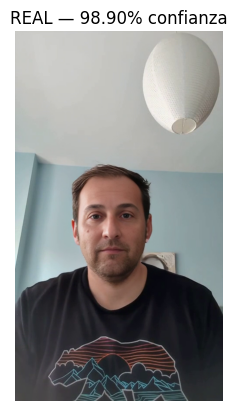

In [ ]:
# ✅ INSTALAR DEPENDENCIAS
!pip install -q opencv-python matplotlib tensorflow

# ✅ IMPORTAR LIBRERÍAS
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.xception import preprocess_input
from google.colab import files

# ✅ SUBIR MODELO .h5 DESCARGADO DE KAGGLE
print("🔼 Sube tu modelo .h5 (descargado manualmente desde Kaggle)")
uploaded_model = files.upload()
model_filename = next(iter(uploaded_model))
model = load_model(model_filename)
print(f"✅ Modelo cargado: {model_filename}")

# ✅ SUBIR IMAGEN O VIDEO A ANALIZAR
print("\n🔼 Ahora sube una imagen o video a analizar")
uploaded_file = files.upload()
file_path = next(iter(uploaded_file))

# ✅ EXTRAER FOTOGRAMA (si es video)
def extract_frame(video_path):
    cap = cv2.VideoCapture(video_path)
    total = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    cap.set(cv2.CAP_PROP_POS_FRAMES, total // 2)
    ret, frame = cap.read()
    cap.release()
    return frame if ret else None

# ✅ CARGAR IMAGEN O VIDEO
if file_path.lower().endswith(('.mp4', '.avi', '.mov')):
    frame = extract_frame(file_path)
else:
    frame = cv2.imread(file_path)

if frame is None:
    raise ValueError("❌ No se pudo procesar el archivo")

# ✅ PREPROCESAMIENTO PARA EL MODELO
rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
resized = cv2.resize(rgb, (299, 299))
x = preprocess_input(resized.astype(np.float32))
x = np.expand_dims(x, 0)

# ✅ PREDICCIÓN
pred = model.predict(x)[0][0]
label = "REAL" if pred < 0.5 else "FAKE"
confidence = (1 - pred) if label == "REAL" else pred

# ✅ MOSTRAR RESULTADO
plt.imshow(rgb)
plt.axis('off')
plt.title(f"{label} — {confidence:.2%} confianza")
plt.show()
